4. 이미지 처리  
     - 회선 방법(이미지 Filtering)   
       샤프닝Sharpening 또는 크리스프닝Crispening: 영상 내의 엣지 부분을 강조하여 영상을 더욱 선명한 느낌으로 만들어주는 영상 처리 기법
   
    - 주변의 정보를 사용하여 자신의 화소 값을 업데이트하는 것으로  
      필터가 이미지의 각 픽셀을 순회하면서 해당 픽셀 주위의 픽셀들와 곱해져 더해진다.  
    
    - 필터  후 (화소 값) × (필터) 로 연산한다. 
    
     필터의 종류
        
         -하이 패스 필터 :　방향에 관계없이 에지를 추출
　
        - 그라디언트 필터 :　1 차 미분 필터로 1 방향의 에지 추출.
                            커널을 회전시키는 것으로, 상하 방향, 좌우 방향의 
                            어느 방향의 에지를 추출 할 것인지를 지정할 수 있다.  
　
        - 라플라시안 필터 :　2 차 미분 필터로 평면의 모든 방향의 에지 추출
　
         -가우시안 필터 :　 노이즈 제거에 사용 
     
    
    - filter2D(src(입력대상), dst(출력대상), ddepth(출력이미지 깊이), kernel(회선커널) 
            회선커널 :height와 weight를 설정하여 해당 구역의 평균
    

In [26]:
#1)주변 정보에서 화소 값을 계산하고 노이즈를 계산한다.  
import  cv2  
import  numpy  as  np

kernel  =  np . ones (( 3 , 3 ))  / 9.0  # 회선에 사용하는 필터
img  =  cv2 . imread ( 'c:\\myImg\\letters.jpg',0 ) 

img_kel  =  cv2 . filter2D ( img ,  -1,  kernel ) 
# 인수 "-1"은 원본 이미지 (img)를 돌려주는 것을 의미

#라플라시안 필터  (3*3)

kernel_laplacian_3X3 = np.array ([ [1,1,1],
                                   [1,-8,1],
                                   [1,1,1]
                                  ],np.float32)


img_kel_laplacian =  cv2 . filter2D ( img ,  -1,  kernel_laplacian_3X3  )

#라플라시안 필터  (3*3)

kernel_laplacian_3X3_02 = np.array ([ [-1,-1,-1],
                                   [-1,9,-1],
                                   [-1,-1,-1]
                                  ],np.float32)


img_kel_laplacian02 =  cv2 . filter2D ( img ,  -1,  kernel_laplacian_3X3_02  )


#gaussian 

kernel_gaussian = np.array (        [ [1,2,1],
                                   [2,4,2],
                                   [1,2,1]
                                  ],np.float32) /16

img_kel_gaussian =  cv2 . filter2D ( img ,  -1,  kernel_gaussian  )


# 이미지 보기  
cv2.imshow('img_kel', img_kel  )
#cv2.imshow('laplacian',img_kel_laplacian)
#cv2.imshow('laplacian02',img_kel_laplacian02)
cv2.imshow('img_kel_gaussian',img_kel_gaussian)

#종료
cv2.waitKey(0) # 무한기다림  
cv2.destroyAllWindows()


                     
                      

 필터처리과정 영상내에서 점으로 마스크 움직임으로 이루어지고 감지한다. 
 주파수에서 신호처리를 하기 위해서 푸리에 변환에 근원을 가진다
 영상의 화소에 직접적으로 수행되는 필터처리를 구현해야 하며 공간필터라는 용어를 사용한다.
 평활화 공간 여파기   _ 히스토그램평활화   / 평활화 필터 
   -> 영상을 흐리게 해서 잡음을 감소 시킨다. 
  1. 평균처리 필터   : 마스크 필터 내의 명암도(값) 의 평균으로 명암값을 대처한다. 
                      3*3    =  9/1
                      5*5 =     25/1 
  2. 가우시안 필터  : 유클리드안 거리를 해결하기 위해 사용   
  
  3. 통계 필터 :  중간값 필터 , median라고 알려진다.[비선형 랜덤 잡음]
     이미지 _사진의 잡음     
 
 
 몽롱화 현상 : 세밀한 부분을 제거하거나 곡선의 잡음 틈들을 연결하는 효과를 지닌다.  
 

(<AxesSubplot:title={'center':'Blurred'}>,
 Text(0.5, 1.0, 'Blurred'))

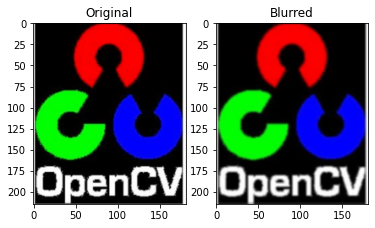

In [34]:
# cv2.blur () 또는 cv2.boxFilter ()  평균 필터  
import cv2
import numpy as np
from matplotlib import pyplot as plt

#img = cv2.imread('c:\\myImg\\Lenna.png')
img = cv2.imread('c:\\myImg\\opencv_logo.png')
blur = cv2.blur(img,(3,3))  # cv2.blur () 또는 cv2.boxFilter ()  평균 필터  

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')

(<AxesSubplot:title={'center':'Gaussian'}>,
 Text(0.5, 1.0, 'Gaussian'))

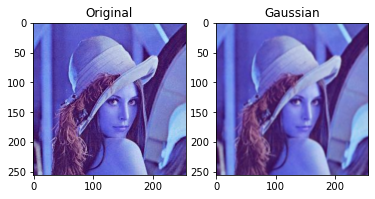

In [37]:
# cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
#sigmaX  행방향 
#sigmaY  열방향    가우스 표준 편차값 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('c:\\myImg\\Lenna.png')
#img = cv2.imread('c:\\myImg\\opencv_logo.png')
blur = cv2.GaussianBlur(img,(5,5),0)  # GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(blur),plt.title('Gaussian')

(<AxesSubplot:title={'center':'medianBlur'}>,
 Text(0.5, 1.0, 'medianBlur'))

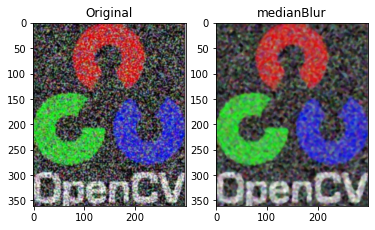

In [43]:
# cv2.    medianBlur(src, ksize[, dst])

import cv2
import numpy as np
from matplotlib import pyplot as plt

#img = cv2.imread('c:\\myImg\\erode.png')
#img = cv2.imread('c:\\myImg\\noise.png')
img = cv2.imread('c:\\myImg\\logoN.png')
blur = cv2.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(blur),plt.title('medianBlur')

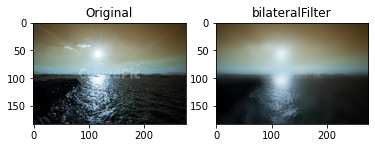

In [49]:
# bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
#비선형 필터를 구현할 때 사용, 밝기변화가 심한 부분은 남겨두고 휘도변화만 원만하게 만들어 준다.  
 # d: 현재픽셀의 이웃한 픽셀의 지름 정의  
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('c:\\myImg\\bg.jpg')
#img = cv2.imread('c:\\myImg\\noise.png')
#img = cv2.imread('c:\\myImg\\logoN.png')
blur = cv2.bilateralFilter(img,20,250,100)
#1*2   1번째  
#1*2    2번째 
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(blur),plt.title('bilateralFilter')
plt.show()

4. 이미지 처리   : 이미지 팽창 , 수축 
 cv2.erode(): 수축 -> cv2.dilate() 팽창
  싱크대 조리기구 걸려있다.  -> 카테고리...
 cv2. morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> ds

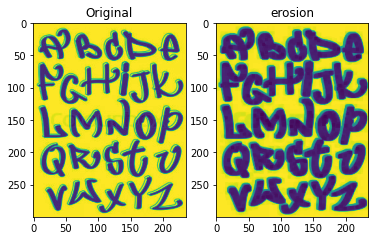

In [51]:
#수축 
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('c:\\myImg\\letters.jpg',0 )
#5X5 
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(erosion),plt.title('erosion')
plt.show()

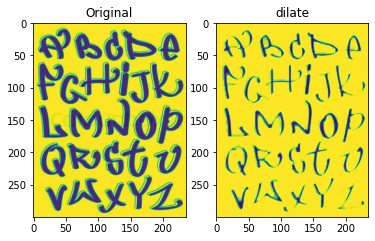

In [1]:
#수축 
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('c:\\myImg\\letters.jpg',0 )
#5X5 
kernel = np.ones((5,5),np.uint8)
dilates = cv2.dilate(img,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(dilates),plt.title('dilate')
plt.show()

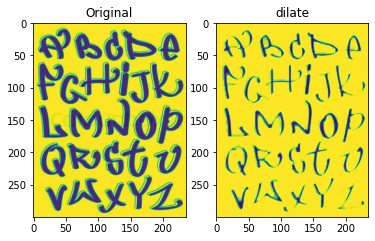

In [1]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('c:\\myImg\\letters.jpg',0 )
#5X5 
kernel = np.ones((5,5),np.uint8)
dilates = cv2.dilate(img,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(dilates),plt.title('dilate')
plt.show()

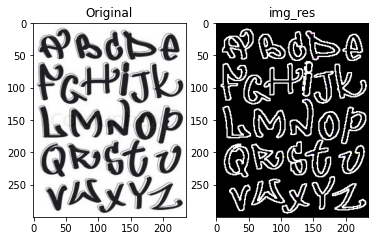

In [2]:
#cv2. morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> ds
#cv2.MORPH_CLOSE  : 팽창한 다음 수축 
#cv2.MORPH_OPEN  : 수축한 다음 팽창한다. 
#cv2.MORPH_BLACKHAT  : 입력한 이미지 와  처리된 이미지의 차이를 표시 
#cv2.MORPH_GRADIENT  : 외곽선
#cv2.MORPH_TOPHAT : 9X9 의 커널크기 
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('c:\\myImg\\letters.jpg' )
ret, img_th =cv2.threshold(img,110,255,cv2.THRESH_BINARY)
kernel = np.ones((3,3) ,dtype = np.uint8)
img_d = cv2.dilate(img_th,kernel )
img_e =cv2.erode(img_th,kernel )


img_res =cv2. morphologyEx(img_th, cv2.MORPH_GRADIENT,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(img_res),plt.title('img_res')
plt.show()


 

In [ ]:
#5. 특정 픽셀   - ORB 특징 픽셀 추출  , 매칭, 거리계산 

In [3]:
#cv2.getStructuringElement ()

cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [4]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [5]:
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

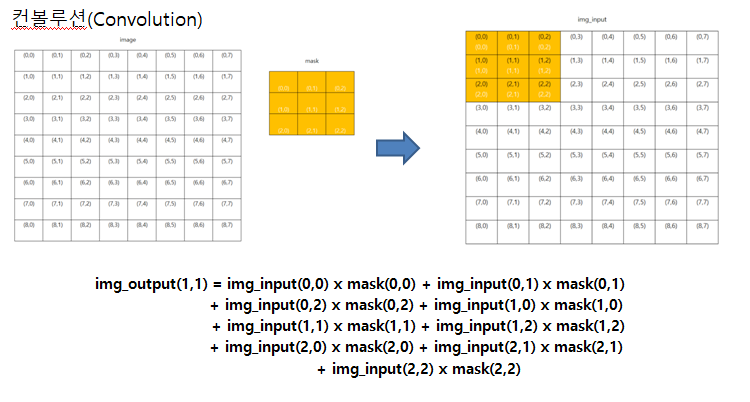

<<회선 정리 >>
1. 회선은  마스크내의 원소값과 공간 영역에 있는 입력 영상의 화소값들을 대응되고 곱하고 출력 화소값을 계산하는 것
 이때, 입력 영상에 곱해지는 마스크를 커널, 윈도우, 필터라고 부른다 
 
2. bluring은 부드러운 영상, 흐려지는 결과  -> 마스크의 원소를 모두 같은 값으로 지정해서 수행, 전체 합이 1이 되어야 한다.  

3. sharpening 은 출력화소가 두드러지게 나타나면서 선명하고 날까로운 영상 ->회선 마스크에서 중심계수와 주변계수의 차이를 크게만든다.   전체합이 1이 되어야하고 중기계수는 큰값, 주변계수는 음수값을 갖게한다. 
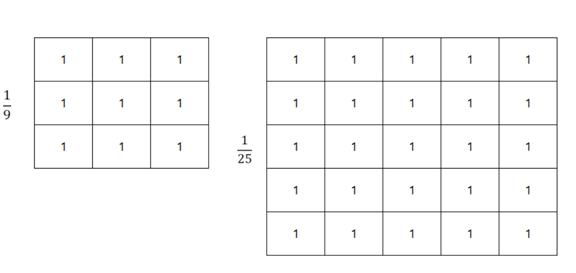

4.에지 : 화소값이 급격하게 변화되는 부분   [크기,위치,모양]을 값으로 방향을 탐지한다.  

5. 에지는 이웃하는 두화소의 차분으로 구할 수 있으며 미분 공식과 유사하다.  
   미분마스크로 회선을 수행하면서 에지를 리턴받을 수 있다. 1차 미분 마스크 (소벨(sobel),프리윗(Prewitt),로버츠(Roberts) )
   
6. 2차미분 에지 : 라플라시안(Laplacian), LoG(  Laplacian of Gaussian) ,DoG( Difference of  Gaussian)


7. 캐니 에지 검출 :  블러링을 노이즈제거 -> 화소기울기로 강도와 방향을 소벨로 검출 -> 최대값으로 제어 -> 임계값에지 결정  
    Canny()
    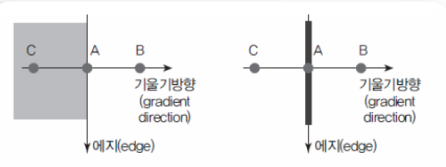
    
   기울기 화소 선택
   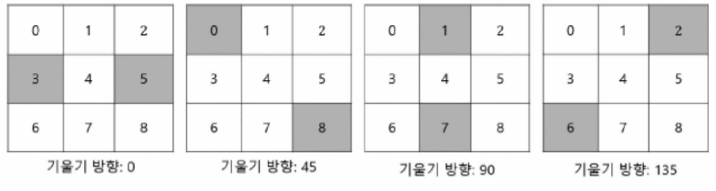

8. 비선형 공간필터링  : 최솟값, 최댓값, 평균값, 중간값등의 필터링
 -최솟값, 최댓값: 마스크 범위에서 출력화소로 결정한다, 최소값 필터링 영상이 어두워지고, 최댓값은 영상이 밝아진다. 
 -평균값(입력화소) : 마스크 범위의 입력화소들을 평균해서 출력 화소를 결정 / 블러링과 같은 효가가 난다
 -중간값 : 마스크 범위의 입력화소들을 정렬 후  중간값을  출력 화소를 결정
    ( 임펄스작업등의 잡음제거등을 할경우 마스크 범위내에서 가장 큰값, 혹은 가장 작은값이 되기 때문에 출력 화소에서 배재되어
     중간값을 사용하게 된다. )

9. 가우시안 블러링은 정규분포 곡선을 갖는 마스크를 가우시안 수식에 따라 생성한 결과를 마스크로 회선을 수행한다.  
   정규분포 마스크는 평균과 표준편차로 생성하기 때문에 표준편차가 클수록 영상이 흐려져 생성된다  
   
10. 모폴리지(열림연산, 닫힌 연산)는 행태학적 방법을 영상으로 처리하는 것이며 침식과 팽창연산을 한다. 
   - 침식 : 객체의 크기가 축소하는 것을 말하며 영상내에서 작은 크기의 잡음 제거  
   - 팽창:  객체의 크기가 확대되면서 빈공간을 채울 때 사용  
   
   -열림연산 : 침식연산 후에 팽창을 수행한다, 침식은 객체는 축소되고 배경의 잡음들은 제거되고,  팽창연산으로 축소되었던
              객체들이 원래 크기로 돌아간다.  
   
   -닫힌 연산 : 팽창 연산 후에 침식연산을 수행한다. 팽창연산으로 객체가 확장되어 객체내부의 빈공간이 메워진 후 
                 침식연산으로 확장되었던 객체의 크기를 원래대로 축소된다. 
                 
     

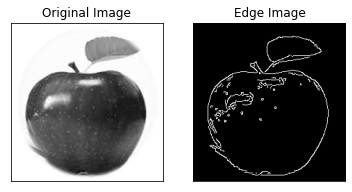

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('c:\\myImg\\apple.jpg',0)
edges = cv2.Canny(img,100,200) #Canny(image, 낮은임계값, 높은 임계값 [, edges[, apertureSize[, L2gradient]]])

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [18]:
#캐니 연습을 해보자 
import numpy as np
from matplotlib import pyplot as plt
import cv2

def onTrackbar(th):
    # 가우시안 블러링  : 명암도 영상(흑색)에서 부드러운영역제거 
    e_edge = cv2.GaussianBlur(reg_gray,(5,5),0)  
    #캐니 에지 검출 
    e_edge = cv2.Canny(e_edge, th, th*2 ,5)  
    
    h,w  = img.shape[:2]
    cv2.rectangle(e_edge, (0,0,w,h),255,-1) #흰색 사각형그리기 
    color_edge = cv2.bitwise_and(res_img,res_img,mask=e_edge) #mask=e_edge : 컬러이미지의 에지부분만 복사  
    cv2.imshow("edge", color_edge)    


img = cv2.imread('c:\\myImg\\apple.jpg',cv2.IMREAD_COLOR) 
if img is None : raise Exception("파일오류 ")
    
    
th =50
res_img = cv2.repeat(img, 1,2)  #가로로 반복  
 #BGR->GRAY
reg_gray = cv2.cvtColor(res_img,cv2.COLOR_BGR2GRAY) #흑백,-> 명암도 영상  


cv2.namedWindow("edge", cv2.WINDOW_AUTOSIZE) #윈도우 생성
cv2.createTrackbar("Canny","edge",th,100, onTrackbar) #트랙바 생성, onTrackbar 콜백함수생성

onTrackbar(th)
cv2.waitKey(0)   
    

-1

In [9]:
# 모폴리지 예제 ..
#  닫힘 연산 마스크 -> 명암도 -> 블러링 -> 소벨에지 -> 이진화 닫힘 연산(모폴리지)
# Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst 
# Soble(입력이미지, 출력이미지 비트단위, dx(x방향미분차수), dy(y방향으로 미분차수, ksize(커널의 크기) ) )
#   (dx,dy)  =(1,0)  => 가로 방향의 윤곽검출 
#   (dx,dy)  =(0,1)  => 세로 방향의 윤곽검출 
#   (dx,dy)  =(1,1)  => 대각선 오른 쪽 방향으로 윤곽검출 
import numpy as np
from matplotlib import pyplot as plt
import cv2

#1. 이미지를 컬러로 읽자 
image  = cv2.imread( "c:\\myImg\\disp.jpg", cv2.IMREAD_COLOR)
image  = cv2.resize(image, (700,700))

#2. 닫힘 연산 마스크 
mask =np.ones((5,17),np.uint8)   # cv2.MORPH_CLOSE

#3. 명암도 영상변환  = 흑백 이미지 변환 
gray_img = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY) 

#4. 블러링 : 핸드폰 뽀샤시 작업  -> 영상에서 화소값이 급격하게 변하는 부분을 감소시킨다. 
gray_img = cv2.blur(gray_img,(5,5) ) 

#5.소벨에지  
gray_img = cv2.Sobel(gray_img,cv2.CV_8U, 1,0,5) #소벨 에지  : 윤곽을 이용한 공간 필터  =  cv2.filter2D() 

#6. 이진화 닫힘 연산(모폴리지)
a , th_img =cv2.threshold(gray_img , 120,255, cv2.THRESH_BINARY) #임계값으로 힌색, 검정색  

morph_res = cv2.morphologyEx(th_img, cv2.MORPH_CLOSE, mask, iterations=3)


cv2.imshow("원본", image)
cv2.imshow("binary img ",th_img )
cv2.imshow("morph_res",morph_res)

cv2.waitKey(0)   



-1

블러링 산수 

50   60  90   50 100
100  90  200  50  30
100 100  100  200 100
100 100  150  150  50
30   90   80   70  160 
(입력 영상)
1. 공통부분의 합   = 60+90 + 200+100 +100  
2. O22  = (50+100+100 +공통부분의 합 ) /9 

75   98   90   
83   99   104  
98   116  127  

(출력 영상)
